In [7]:
import mglearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#한글꺠짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 어떤 데이터셋이 사라집니다 같은 문구 뺴고 오류만 출력시키는거 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons

In [2]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42
)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

In [4]:
bagging = BaggingClassifier(LogisticRegression(),n_estimators=100,oob_score=True, n_jobs=-1,random_state=42)
bagging.fit(Xc_train, yc_train)


BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [6]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train,yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test,yc_test)))
print("OOB 샘플의 세트 정확도: {:.3f}".format(bagging.oob_score_))


훈련 세트 정확도: 0.955
테스트 세트 정확도: 0.944
OOB 샘플의 세트 정확도: 0.944


In [9]:
# Random forest 에서 변수 선택 없는거랑 똑같 

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42 )
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

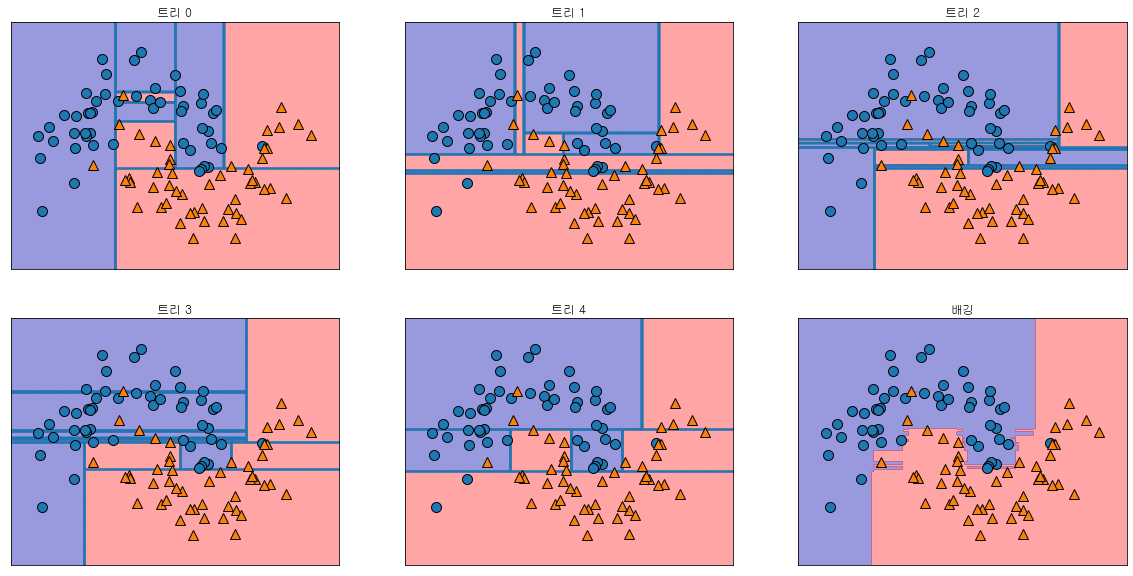

In [11]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("배깅")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [12]:
# Random forest 에서 변수 선택 없는거랑 똑같 

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42 )
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train,yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test,yc_test)))
print("OOB 샘플의 세트 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 세트 정확도: 0.948


In [ ]:
# 엑스트라 트리

from sklearn.ensemble import ExtraTreesClassifier
